In [3]:
#모델 학습
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

#tensorflow image processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from sklearn.metrics import multilabel_confusion_matrix

#train, test 분류
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

#날짜 생성
from datetime import datetime

#그래프 생성
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

In [2]:
tf.config.run_functions_eagerly(True)

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8731083275615944557
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12739064150508029253
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3050779444
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3933628049369891839
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5485180911502331381
physical_device_desc: "device: XLA_GPU device"
]


In [8]:
dir_name = "Learning_log"

def make_Tensorboard_dir(dir_name):
    root_logdir = os.path.join(os.curdir, dir_name)
    sub_dir_name = datetime.today().strftime("%Y%m%d-%H%M%S")
    return os.path.join(root_logdir, sub_dir_name)

TB_log_dir = make_Tensorboard_dir(dir_name)
TensorB = tf.keras.callbacks.TensorBoard(log_dir = TB_log_dir)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
train_folder = 'C:/Users/BVer/dog_/YJ_Kim/dataset/img_mixed/'
train_dogs = pd.read_csv('C:/Users/BVer/dog_/YJ_Kim/dataset/filelist.csv')
train_dogs.head()

,fileName,name,label,Extension,Folder_Path,folder
0,affenpinscher1.jpg,affenpinscher1,affenpinscher,.jpg,C:/Users/BVer/dog_/YJ_Kim/dataset/img_mixed/,/img_mixed/
1,affenpinscher10.jpg,affenpinscher10,affenpinscher,.jpg,C:/Users/BVer/dog_/YJ_Kim/dataset/img_mixed/,/img_mixed/
2,affenpinscher100.jpg,affenpinscher100,affenpinscher,.jpg,C:/Users/BVer/dog_/YJ_Kim/dataset/img_mixed/,/img_mixed/
3,affenpinscher101.jpg,affenpinscher101,affenpinscher,.jpg,C:/Users/BVer/dog_/YJ_Kim/dataset/img_mixed/,/img_mixed/
4,affenpinscher102.jpg,affenpinscher102,affenpinscher,.jpg,C:/Users/BVer/dog_/YJ_Kim/dataset/img_mixed/,/img_mixed/


In [ ]:
target_labels = train_dogs['label']

In [7]:
# One hot code the labels - need this for the model
one_hot = pd.get_dummies(target_labels, sparse = True)
one_hot_labels = np.asarray(one_hot)

In [8]:
train_data = np.array([img_to_array(load_img(img, target_size=(200, 200))) for img in (train_folder + train_dogs['fileName'].values).tolist()]).astype('float32')

C:\Users\BVer\miniconda3\envs\sch\lib\site-packages\PIL\Image.py:974: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [27]:
x_train, x_validation, y_train, y_validation = train_test_split(train_data, one_hot_labels, test_size=0.2, stratify=np.array(target_labels), random_state=100)

In [17]:
print ('x_train shape = ', x_train.shape)
print ('x_validation shape = ', x_validation.shape)
print ('y_train shape = ', y_train.shape)
print ('y_validation shape = ', y_validation.shape)

x_train shape =  (25889, 200, 200, 3)
x_validation shape =  (6473, 200, 200, 3)
y_train shape =  (25889,)
y_validation shape =  (6473,)


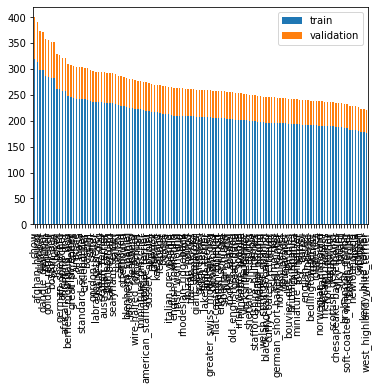

In [11]:
data = y_train.value_counts().sort_index().to_frame()   # this creates the data frame with train numbers
data.columns = ['train']   # give the column a name
data['validation'] = y_validation.value_counts().sort_index().to_frame()   # add the validation numbers
new_plot = data[['train','validation']].sort_values(['train']+['validation'], ascending=False)   # sort the data
new_plot.plot(kind='bar', stacked=True)
plt.show()

In [32]:
# dimensions of our images.
img_width, img_height = 200, 200

model = Sequential()

#model.add(Conv2D(32, (7,7), (1,1), input_shape = (100,100,3)))
model.add(Conv2D(64, (3, 3), input_shape=(200, 200, 3), padding = "same"))
model.add(BatchNormalization(axis = 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), (1,1), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), (1,1), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), (1,1), padding = "same"))
model.add(Activation("relu"))
model.add(AveragePooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dense(120, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 64)      1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
activation_9 (Activation)    (None, 200, 200, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
activation_10 (Activation)   (None, 100, 100, 128)     0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 128)      

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   zoom_range = 0.2, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
train_generator = train_datagen.flow(x_train, y_train, shuffle=False, batch_size=16)
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = train_datagen.flow(x_validation, y_validation, shuffle=False, batch_size=16)

In [38]:
epochs = 60
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = len(train_generator),
    validation_data = val_generator,
    validation_steps = len(val_generator),
    epochs = epochs,
    callbacks=[
        ModelCheckpoint('models/' + part + '_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stop, TensorB
    ]
)

Epoch 1/40
1619/1619 [==============================] - 314s 194ms/step - loss: 4.7823 - accuracy: 0.0116 - val_loss: 4.7792 - val_accuracy: 0.0124
Epoch 2/40
1619/1619 [==============================] - 298s 184ms/step - loss: 4.7812 - accuracy: 0.0116 - val_loss: 4.7797 - val_accuracy: 0.0124
Epoch 3/40
1619/1619 [==============================] - 305s 188ms/step - loss: 4.7830 - accuracy: 0.0120 - val_loss: 4.7795 - val_accuracy: 0.0124
Epoch 4/40
1619/1619 [==============================] - 284s 176ms/step - loss: 4.7808 - accuracy: 0.0124 - val_loss: 4.7790 - val_accuracy: 0.0124
Epoch 5/40
1619/1619 [==============================] - 296s 183ms/step - loss: 4.7806 - accuracy: 0.0121 - val_loss: 4.7792 - val_accuracy: 0.0124
Epoch 6/40
1619/1619 [==============================] - 288s 178ms/step - loss: 4.7805 - accuracy: 0.0124 - val_loss: 4.7790 - val_accuracy: 0.0124
Epoch 7/40
1619/1619 [==============================] - 294s 182ms/step - loss: 4.7804 - accuracy: 0.0124 - val_

NameError: name 'trial' is not defined

In [40]:
trial = 1
model.save_weights(datetime.today().strftime("%Y%m%d")+ '_weights_' +str(epochs) + '_' + str(trial) +'.h5')
model.save(datetime.today().strftime("%Y%m%d")+ '_model_'+ str(epochs) + '_' + str(trial) +'.h5')

Text(0.5, 0, 'Epoch')

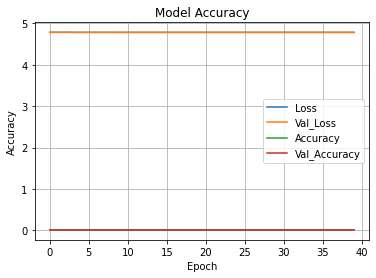

In [41]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val_Loss')
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.legend()
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

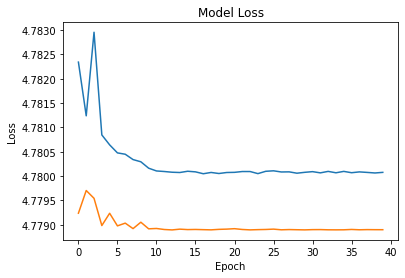

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

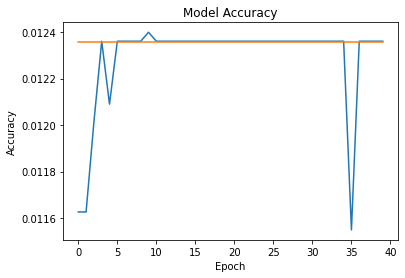

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [45]:
predictions = model.predict(val_generator)
#predictions_class = model.predict_classes(validation_generator)

In [48]:
(model.predict(val_generator) > 0.5).astype("int32")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
predictions

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, batch_size=50, verbose=1)

In [49]:
scores = model.evaluate_generator(val_generator, steps=5)

Instructions for updating:
Please use Model.evaluate, which supports generators.


Instructions for updating:
Please use Model.evaluate, which supports generators.


In [50]:
print("-- Evaluate --")
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 1.25%
